In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style='darkgrid')

In [6]:
df = pd.read_csv('Data/shopeep_koreantop_clothing_shop_data.csv')
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


In [7]:
df.columns

Index(['pk_shop', 'date_collected', 'shopid', 'name', 'join_month', 'join_day',
       'join_year', 'item_count', 'follower_count', 'response_time',
       'response_rate', 'shop_location', 'rating_bad', 'rating_good',
       'rating_normal', 'rating_star', 'is_shopee_verified',
       'is_official_shop'],
      dtype='object')

## 1. Vẽ biểu đồ tần số số lượng shop gia nhập theo các năm.

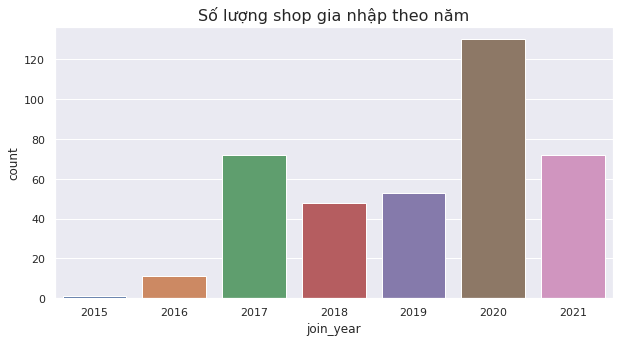

In [42]:
plt.rcParams['figure.figsize'] = [10,5]
sns.countplot(x = 'join_year', data = df.drop_duplicates(subset = ['shopid','join_year']))
plt.title('Số lượng shop gia nhập theo năm', fontsize = 16)
plt.show()

## 2, Vẽ biểu đồ xu hướng thể hiện mối quan hệ giữa tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt.

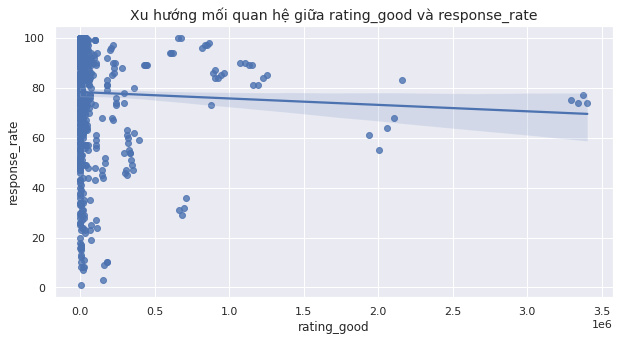

In [49]:
sns.regplot(y = 'response_rate', x = 'rating_good', data = df)
plt.title('Xu hướng mối quan hệ giữa rating_good và response_rate', fontsize = 14)
plt.show()

## 3. Vẽ biểu đồ xu hướng thể hiện mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá xấu.

In [47]:
df['response_time'] = pd.to_datetime(df['response_time'].str.strip(), format = '%H:%M:%S')

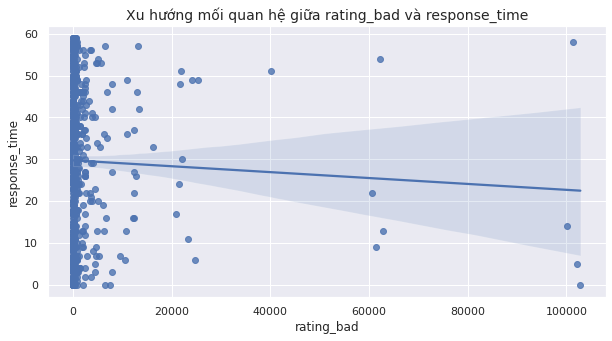

In [51]:
sns.regplot(x = 'rating_bad', y = df['response_time'].dt.second, data = df)
plt.title('Xu hướng mối quan hệ giữa rating_bad và response_time', fontsize = 14)
plt.show()

## 4. Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình. 

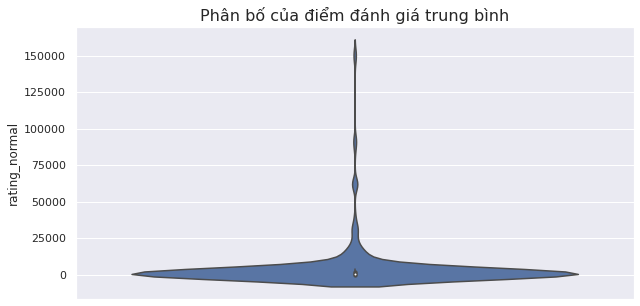

In [54]:
sns.violinplot(y = 'rating_normal', data = df)
plt.title('Phân bố của điểm đánh giá trung bình', fontsize = 16)
plt.show()

## 5. Vẽ biểu đồ tần số của cửa hàng chính thức và không chính thức. 

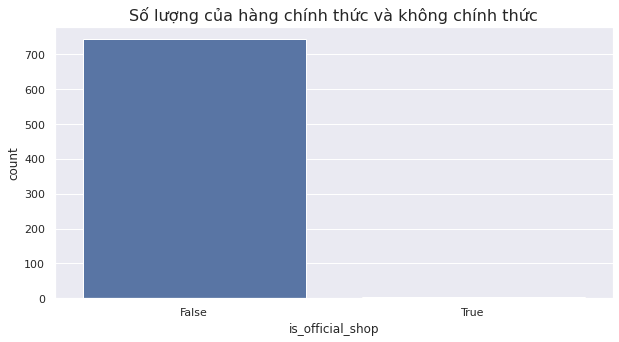

In [62]:
sns.countplot(x = 'is_official_shop', data = df , order=[False, True])
plt.title('Số lượng của hàng chính thức và không chính thức', fontsize = 16)
plt.show()

## 6. Vẽ biểu đồ tần số của cửa hàng được xác thực với chưa xác thực. 

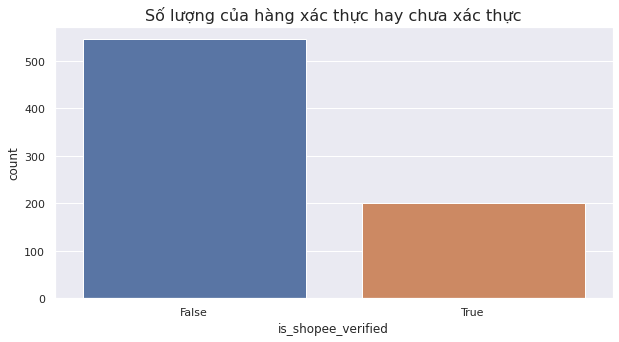

In [64]:
sns.countplot(x = 'is_shopee_verified', data = df , order=[False, True])
plt.title('Số lượng của hàng xác thực hay chưa xác thực', fontsize = 16)
plt.show()